# **Assignment 10** 
CUNY DATA 602.   
Andrew Bowen

In [2]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

#plotly or other graphing library
import matplotlib.pyplot as plt

In [3]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris(as_frame=True)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston = raw_df.values[1::2, 2]

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [4]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [6]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [7]:
neigh = KNN(n_neighbors=5)
neigh.fit(iris.data[iris.feature_names], iris.target)

KNeighborsClassifier()

In [8]:
# mapping target names
mapping = {i:f for i,f in enumerate(list(iris.target_names))}

p = neigh.predict([[1.5, 0.6, 2.3, 17]])
print(mapping.get(p[0]))


virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [9]:
X = iris.data[iris.feature_names]
y = iris.target

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)


model = KNN(n_neighbors=5)
model.fit(X_train, y_train)

#print accuracy score between predicted and test values
print(accuracy_score(y_test, model.predict(X_test)))


0.98


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).


*We can borrow from this `scikit-learn` tutorial on generating over-fitting and under-fitting curves*

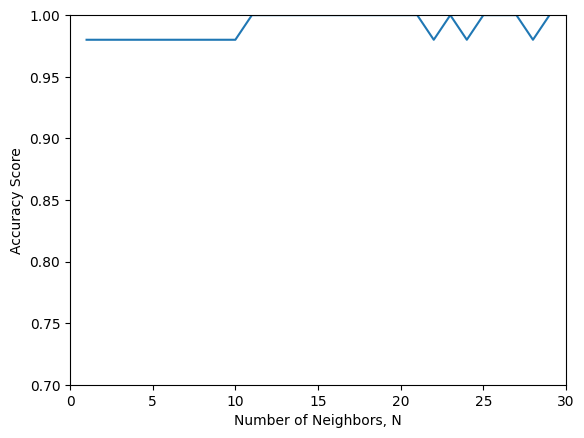

In [16]:
n_values = np.arange(1,30)
test_scores = []
for n in range(1,30):
  model = KNN(n_neighbors=n)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_scores.append(model.score(X_test, y_pred))

scores = np.array(scores)
plt.plot(n_values, scores)
plt.xlim(0, 30)
plt.ylim(0.7, 1)
plt.xlabel("Number of Neighbors, N")
plt.ylabel("Accuracy Score")

plt.show()


Going to avoid the questions related to [the Boston dataset](https://data602sp23.slack.com/archives/C04KZND8V55/p1683064985419439?thread_ts=1683064896.753759&cid=C04KZND8V55)